<a href="https://colab.research.google.com/github/rendihartadi20/Latihan1_Kelompok1/blob/main/Kelompok1_Latihan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modelling

In [ ]:
# Import module yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
# Contoh dataset
print(documents[1])
print(" \n\nTotal dokumennya ada sebanyak",len(documents))








Yeah, do you expect people to read the FAQ, etc. and actually accept hard
atheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out
of steam!







Jim,

Sorry I can't pity you, Jim.  And I'm sorry that you have these feelings of
denial about the faith you need to get by.  Oh well, just pretend that it will
all end happily ever after anyway.  Maybe if you start a new newsgroup,
alt.atheist.hard, you won't be bummin' so much?






Bye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) 
--
Bake Timmons, III
 

Total dokumennya ada sebanyak 11314


In [ ]:
 dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Sehingga, dataset punya 11,314 dokumen teks yang terdistribusi dari 20 kelompok berita yang berbeda.

# Preprocessing

In [ ]:
#Ubah dataset kedalam format pandas
news_df = pd.DataFrame({'document':documents})

# Mengganti titik, koma, angka, dll. dengan spasi kosong sehingga tersisa kata-kata saja
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# Menghilangkan kata yang kurang dari 4 huruf karena biasanya bukan merupakan kata penting
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase to nullify case sensitivity.
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Dilakukan penghapusan stop-word (kata-kata yang umum tetapi tidak membawa informasi apapun seperti "itu, tentang, karena, dll")

In [ ]:
# Import kosakata stop word (kata yang umum digunakan tapi bukan topik) dari spacy 
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# tokenization - break sentences into words
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# menghilangkan stop word
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization - Join words to get back the sentences
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

Penghapusan stop-word adalah dengan cara memecah kalimat menjadi kata-kata yang berdiri sendiri. Kemudian disatukan kembali setelah penghapusan stop-word selesai.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer(stop_words='english', 
  max_features= 1000, # menyimpan 1000 kata yang paling sering muncul dalam dokumen 
  max_df = 0.5, 
  smooth_idf=True)

vectorizer2 = TfidfVectorizer(stop_words='english', 
  max_features= 2000, # menyimpan 2000 kata yang paling sering muncul dalam dokumen  
  max_df = 0.5, 
  smooth_idf=True)

vectorizer3 = TfidfVectorizer(stop_words='english', 
  max_features= 4000, # menyimpan 4000 kata yang paling sering muncul dalam dokumen 
  max_df = 0.5, 
  smooth_idf=True)

X1 = vectorizer1.fit_transform(news_df['clean_doc'])
X2 = vectorizer2.fit_transform(news_df['clean_doc'])
X3 = vectorizer3.fit_transform(news_df['clean_doc'])

X1.shape # mengecek bentuk matriks dokumen yang terbentuk

(11314, 1000)

Menggunakan sklearn TfidVectorizer untuk membuat dokumen dengan 1000, 2000, dan 4000 suku. Setiap baris dari matriks adalah vektor yang merepresentasikan dokumen dengan panjang k
(jumlah topik).


In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD merepresentasikan dokumen - dokumen dan kata - kata dalam bentuk vektor
svd_model1 = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model2 = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model3 = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

X1_topics = svd_model1.fit_transform(X1)
X2_topics = svd_model2.fit_transform(X2)
X3_topics = svd_model3.fit_transform(X3)
len(svd_model3.components_)



20

Digunakan sklearn’s TruncatedSVD untuk merepresentasikan setiap dokumen ke dalam vektor dengan cara mendekomposisi matriks dokumen menjadi beberapa matriks

In [ ]:
print("\n Terms = 1000 word")
terms1 = vectorizer1.get_feature_names()
for i, comp in enumerate(svd_model1.components_):
    terms_comp = zip(terms1, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")
    
print("\n Terms = 2000 word")
terms2 = vectorizer2.get_feature_names()
for i, comp in enumerate(svd_model2.components_):
    terms_comp = zip(terms2, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

print("\n Terms = 4000 word")
terms3 = vectorizer3.get_feature_names()
for i, comp in enumerate(svd_model3.components_):
    terms_comp = zip(terms3, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")


 Terms = 1000 word
Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail gam

Untuk mengetahui topik apa saja yang dibahas, diperlukan visualisasi data untuk topik menggunakan t-SNE 

In [ ]:
from sklearn.manifold import TSNE
embedding1 = TSNE(n_components=2, learning_rate="auto", init="random").fit_transform(X1_topics)
embedding2 = TSNE(n_components=2, learning_rate="auto", init="random").fit_transform(X2_topics)
embedding3 = TSNE(n_components=2, learning_rate="auto", init="random").fit_transform(X3_topics)

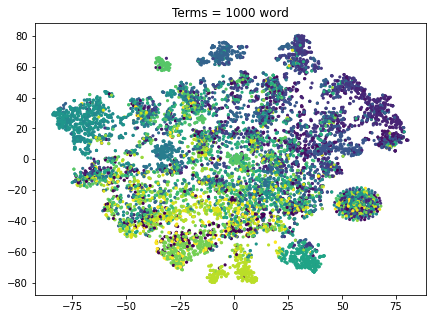

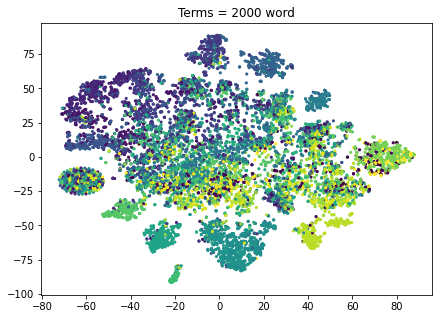

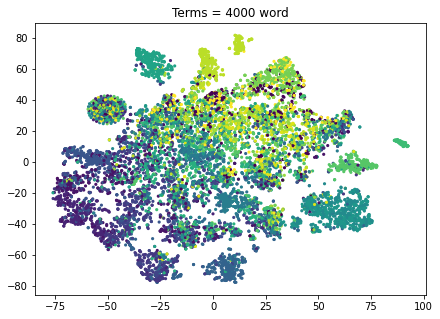

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(embedding1[:, 0], embedding1[:, 1], 
c = dataset.target, # color = array dgn elemen [0, 19], mengelompokkan dokumen ke topik ke 0-19 (satu kelompok satu warna)
s = 10, # size
edgecolor='none')
plt.title("Terms = 1000 word")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(embedding2[:, 0], embedding2[:, 1], 
c = dataset.target, 
s = 10, 
edgecolor='none')
plt.title("Terms = 2000 word")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(embedding3[:, 0], embedding3[:, 1], 
c = dataset.target,
s = 10, 
edgecolor='none')
plt.title("Terms = 4000 word")
plt.show()

Dari hasil visualisasi di atas, setiap dot menggambarkan dokumen, dan warna-warna yang berbeda menggambarkan 20 newsgroups.